In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

In [51]:
zillow_11 = pd.read_csv('./Resources/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_11.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3064324,3053163,3031928,3032413,3037638,3038871,3031707,3013141,3005806,3011777
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,398286.0,...,1007829,1007140,1005980,1004071,1002907,1002515,1002070,1000673,998107,995198
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,6418574,6453737,6476901,6488955,6440409,6386920,6323189,6289909,6238680,6221807
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,190908.0,...,335594,335558,335428,335402,335042,335201,335626,336623,337462,337961
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,515152.0,...,1251896,1249248,1246234,1243491,1242884,1245305,1247131,1247754,1245511,1245141


In [52]:
df_4bdr=pd.melt(zillow_11,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City','Metro', 'CountyName']) 
df_4bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,398286.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,190908.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,515152.0
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,107388.0
6,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,115424.0
8,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1/31/1996,108152.0
9,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,250004.0


In [53]:
df_4bdr["type"]="4-bdr"
df_4bdr["variable"]=df_4bdr["variable"].astype('datetime64[m]')
df_4bdr["epoch"] = (df_4bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()
df_4bdr=df_4bdr.dropna(how="any")
df_4bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,398286.0,4-bdr,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,190908.0,4-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,515152.0,4-bdr,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,107388.0,4-bdr,8.230464e+08
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,115424.0,4-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870963,75095,34430,38959,Zip,MS,MS,Inverness,Indianola,Sunflower County,2020-06-30,40539.0,4-bdr,1.593475e+09
7870964,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2020-06-30,946942.0,4-bdr,1.593475e+09
7870965,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,249801.0,4-bdr,1.593475e+09
7870966,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,910535.0,4-bdr,1.593475e+09


In [54]:
df_4bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,398286.0,4-bdr,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,190908.0,4-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,515152.0,4-bdr,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,107388.0,4-bdr,8.230464e+08
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,115424.0,4-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870963,75095,34430,38959,Zip,MS,MS,Inverness,Indianola,Sunflower County,2020-06-30,40539.0,4-bdr,1.593475e+09
7870964,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2020-06-30,946942.0,4-bdr,1.593475e+09
7870965,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,249801.0,4-bdr,1.593475e+09
7870966,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,910535.0,4-bdr,1.593475e+09


In [55]:
X11=df_4bdr["variable"].values.reshape(-1,1)
y11=df_4bdr["value"].values.reshape(-1,1)

X22=df_4bdr["epoch"].values.reshape(-1,1)
y22=df_4bdr["value"].values.reshape(-1,1)

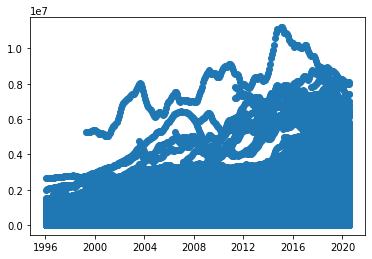

In [56]:
plt.scatter(X11,y11)

In [57]:
# Prediction 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X22, y22, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model
X_test

array([[1.0463904e+09],
       [1.5382656e+09],
       [1.3015296e+09],
       ...,
       [1.4987808e+09],
       [1.5014592e+09],
       [1.2147840e+09]])

In [59]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2S): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 78434443512.28484
R-squared (R2S): 0.01762127395973012


In [60]:
model.predict(np.array([1596662122]).reshape(-1, 1))

array([[328296.18651302]])

In [61]:
##schools_data

schools_data= pd.read_csv('./Resources/number-of-schools.csv')
schools_data.head(10)

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
5,5,2007,LINCOLN,NE,68516,LANCASTER
6,6,2008,LAS VEGAS,NV,89121,CLARK
7,7,2009,LAS VEGAS,NV,89141,CLARK
8,8,2010,ATLANTIC CITY,NJ,8401,ATLANTIC
9,9,2011,WESTFIELD,NJ,7090,UNION


In [62]:
nc_schols=schools_data[schools_data['state']=='NC']

In [63]:
nc_schols_df=nc_schols.groupby("zip")["objectid"].count().reset_index(name="count")
nc_schols_df

,zip,count
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [64]:
nc_df_4bdr=df_4bdr[df_4bdr['State']=='NC']
nc_df_4bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
31,69816,33,28269,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,166563.0,4-bdr,823046400.0
54,69823,56,28277,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,232575.0,4-bdr,823046400.0
84,69672,86,28027,Zip,NC,NC,Concord,Charlotte-Concord-Gastonia,Cabarrus County,1996-01-31,178746.0,4-bdr,823046400.0
138,69431,140,27587,Zip,NC,NC,Wake Forest,Raleigh,Wake County,1996-01-31,265843.0,4-bdr,823046400.0
183,69699,186,28078,Zip,NC,NC,Huntersville,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,204852.0,4-bdr,823046400.0
188,69450,191,27610,Zip,NC,NC,Raleigh,Raleigh,Wake County,1996-01-31,132335.0,4-bdr,823046400.0
191,69340,194,27410,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,177292.0,4-bdr,823046400.0
197,69336,200,27406,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,130326.0,4-bdr,823046400.0
212,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,1996-01-31,127457.0,4-bdr,823046400.0
318,69275,321,27284,Zip,NC,NC,Kernersville,Winston-Salem,Forsyth County,1996-01-31,164285.0,4-bdr,823046400.0


In [65]:
nc_df_4bdr.to_csv('nc_4bed.csv', index=False, header=True)

In [66]:
nc_df_4bdr=nc_df_4bdr.groupby(["City","RegionName"])["value"].mean().reset_index(name="avg")
nc_df_4bdr

,City,RegionName,avg
0,Aberdeen,28315,216032.025510
1,Advance,27006,322164.619565
2,Albemarle,28001,161291.037415
3,Alexander,28701,270758.307407
4,Alexis,28006,252734.003731
...,...,...,...
610,Yadkinville,27055,169151.543011
611,Youngsville,27596,237543.925170
612,Zebulon,27597,207699.343537
613,Zionville,28698,230760.395522


In [67]:
merge_data=pd.merge(nc_df_4bdr,nc_schols_df,left_on="RegionName",right_on="zip")

In [68]:
merge_data['City_category'] = merge_data['City'].astype('category').cat.codes
merge_data

,City,RegionName,avg,zip,count,City_category
0,Aberdeen,28315,2.160320e+05,28315,4,0
1,Advance,27006,3.221646e+05,27006,2,1
2,Albemarle,28001,1.612910e+05,28001,8,2
3,Angier,27501,2.092624e+05,27501,5,3
4,Apex,27502,2.822962e+05,27502,7,4
...,...,...,...,...,...,...
498,Wrightsville Beach,28480,1.119684e+06,28480,1,378
499,Yadkinville,27055,1.691515e+05,27055,4,379
500,Youngsville,27596,2.375439e+05,27596,3,380
501,Zebulon,27597,2.076993e+05,27597,5,381


In [69]:
X=merge_data["City_category"].values.reshape(-1,1)
y=merge_data["avg"].values.reshape(-1,1)

In [70]:
X=merge_data[["City_category"]]
y=merge_data["avg"].values.reshape(-1,1)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [72]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [73]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008052118526324592
Testing Score: 0.0022981930200947076


Mean Squared Error (MSE): 18648088446.431126
R-squared (R2 ): 0.0022981930200947076


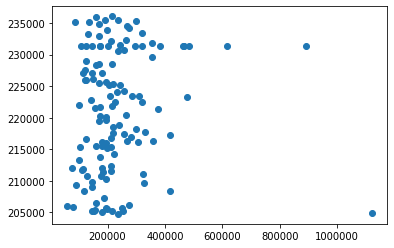

In [74]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION
plt.scatter(y_test,predicted)

Text(0.5, 1.0, 'Residual Plot')

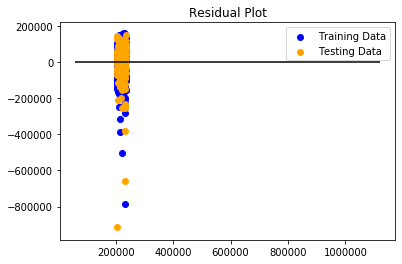

In [75]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [76]:
##income_data

income_data = pd.read_csv('./Resources/rw_census_data.csv')
income_data.head(10)

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
5,60303.0,28547.0,18171.0,612,47.339270
6,10765.0,5388.0,16018.0,616,50.051092
7,23974.0,11879.0,16735.0,617,49.549512
8,6578.0,3309.0,15206.0,622,50.304044
9,42427.0,22617.0,16280.0,623,53.308035


In [77]:
merge_data2=pd.merge(merge_data,income_data,left_on="RegionName",right_on="zipcode")

merge_data2

,City,RegionName,avg,zip,count,City_category,population,poverty_count,median_household_income,zipcode,poverty_rate
0,Aberdeen,28315,2.160320e+05,28315,4,0,13700.0,2826.0,51725.0,28315,20.627737
1,Advance,27006,3.221646e+05,27006,2,1,14555.0,932.0,78095.0,27006,6.403298
2,Albemarle,28001,1.612910e+05,28001,8,2,26601.0,5208.0,45121.0,28001,19.578211
3,Angier,27501,2.092624e+05,27501,5,3,21299.0,2601.0,56338.0,27501,12.211841
4,Apex,27502,2.822962e+05,27502,7,4,40280.0,2248.0,110513.0,27502,5.580933
...,...,...,...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1.119684e+06,28480,1,378,2536.0,216.0,83417.0,28480,8.517350
498,Yadkinville,27055,1.691515e+05,27055,4,379,14131.0,1855.0,44574.0,27055,13.127167
499,Youngsville,27596,2.375439e+05,27596,3,380,18359.0,1624.0,70535.0,27596,8.845798
500,Zebulon,27597,2.076993e+05,27597,5,381,23538.0,2995.0,58514.0,27597,12.724106


In [78]:
X=merge_data2[["City_category","population","median_household_income"]]
y=merge_data2["avg"].values.reshape(-1,1)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [80]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3542493459615529
Testing Score: -1186256.4925748936


In [81]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 2.110527023880586e+16
R-squared (R2 ): -1186256.4925748936


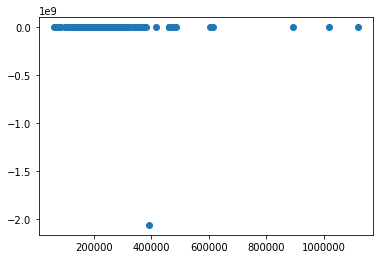

In [82]:
plt.scatter(y_test,predicted)

In [83]:
y_test

array([[ 302547.97959184],
       [ 615270.70068027],
       [ 219440.5503876 ],
       [ 166848.78571429],
       [ 238188.19565217],
       [ 157024.82065217],
       [ 113902.64111498],
       [ 125190.04864865],
       [ 245033.9047619 ],
       [ 199030.75170068],
       [ 192996.2122905 ],
       [ 318731.84013605],
       [ 255741.91756272],
       [ 173103.0170068 ],
       [ 164243.97619048],
       [ 138398.94217687],
       [1119684.3015873 ],
       [ 275177.65201465],
       [ 123978.23809524],
       [ 136478.13513514],
       [ 255619.36734694],
       [ 152822.86734694],
       [ 221384.57823129],
       [ 476891.42307692],
       [ 109350.29591837],
       [ 159333.42857143],
       [  78863.52747253],
       [  66697.75510204],
       [ 257147.05102041],
       [ 199166.40136054],
       [ 223146.45578231],
       [ 110732.71768707],
       [ 245471.34013605],
       [ 169453.58974359],
       [ 161291.03741497],
       [ 105867.63636364],
       [ 210043.99462366],
 

In [84]:
predicted

array([[ 2.87716124e+05],
       [ 3.13087172e+05],
       [ 1.81060285e+05],
       [ 2.06095679e+05],
       [ 2.05896309e+05],
       [ 2.05842180e+05],
       [ 2.02657135e+05],
       [ 1.75219110e+05],
       [ 2.47933256e+05],
       [ 2.08179177e+05],
       [ 2.32529459e+05],
       [ 2.82777196e+05],
       [ 2.65890534e+05],
       [ 2.46883763e+05],
       [ 1.75961281e+05],
       [ 1.51096509e+05],
       [ 3.04034888e+05],
       [ 2.70254559e+05],
       [ 1.88923917e+05],
       [ 1.86688358e+05],
       [ 1.94271886e+05],
       [ 1.72260761e+05],
       [ 2.69970979e+05],
       [ 1.84958592e+05],
       [ 1.60829774e+05],
       [ 1.68277612e+05],
       [ 1.78346393e+05],
       [ 1.61883303e+05],
       [ 3.07859112e+05],
       [ 1.95541516e+05],
       [ 2.25013244e+05],
       [ 1.40319138e+05],
       [ 2.29804727e+05],
       [ 1.90035146e+05],
       [ 2.03620752e+05],
       [ 1.45659236e+05],
       [ 2.04602953e+05],
       [ 3.23450979e+05],
       [ 1.5

In [85]:
merge_data2.to_csv('merged_data_4bed.csv', index=False, header=True)

Text(0.5, 1.0, 'Residual Plot')

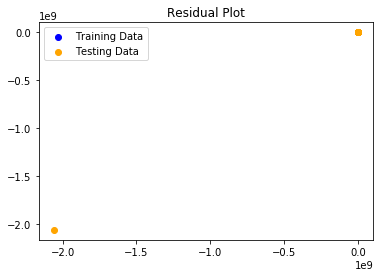

In [86]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")